## Assignment 3: $k$ Nearest Neighbor

`! git clone https://github.com/ds3001f25/knn_assignment.git`

**Do two questions in total: "Q1+Q2" or "Q1+Q3"**


**Q1.**
1. What is the difference between regression and classification?
2. What is a confusion table? What does it help us understand about a model's performance?
3. What does the SSE quantify about a particular model?
4. What are overfitting and underfitting? 
5. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or SSE on the test set, improve model performance?
6. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

1. What is the difference between regression and classification?

The difference between regression and classification is that regression is used to predict a continuous target value, while classification is used to predict a categorical value. So, regression produces a numerical value, while classification produces a categorical label.

2. What is a confusion table? What does it help us understand about a model's performance?

A confusion table is utilized to evaluate the performance of a classification model. It is basically a summary of prediction results for a classification model. It helps us to understand the accuracy, precision, recall, and F1. So, it shows where errors happen and whether the model is better at detecting positives or negatives.

3. What does the SSE quantify about a particular model?

The SSE quantifies the total squared difference between the actual and the predicted values in regression. It shows how well the model actually fits the data, where a low SSE indicates predictions are close to the actual values and a high SSE indicates large errors and a bad fit.

4. What are overfitting and underfitting? 

Overfitting is when the model learns the training data and noise too well, while underfitting is when the model is too simple to capture signal or the existing patterns in the data. So, overfitting does well on training data but poorly on new or test data. Underfitting does poorly on training and test data.

5. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or SSE on the test set, improve model performance?

By splitting the data into training and testing sets, it ensures that we test the model on unseen data, which results in simulating performance in the real world. Choosing k by evaluating accuracy or SSE on the test set prevents overfitting to the training set, resulting in improving generalization.

6. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

The strengths of a class label are that they are simple to act on and have fast decision-making. Weaknesses are that it doesn't have information about uncertainty and doesn't include confidence levels. The strengths of a probability distribution are that it provides confidence scores or levels and allows for threshold tuning. The weaknesses are that it is harder to understand and interpret and requires calibration in order to ensure that the probabilities are meaningful.

**Q2.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

In [2]:
!pip install pandas numpy scikit-learn matplotlib pathlib

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from pathlib import Path

  Using cached pandas-2.3.2-cp313-cp313-macosx_11_0_arm64.whl.metadata (91 kB)
  Using cached numpy-2.3.3-cp313-cp313-macosx_14_0_arm64.whl.metadata (62 kB)
  Using cached matplotlib-3.10.6-cp313-cp313-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached scipy-1.16.2-cp313-cp313-macosx_14_0_arm64.whl.metadata (62 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
  Using cached contourpy-1.3.3-cp313-cp313-macosx_11_0_arm64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.9-cp313-cp313-macosx_11_0_arm64.whl.metadata (6.3 kB)
  Using cached pillow-11.3.0-cp313-cp313-macosx_11_0_arm64.whl.metadata (9.0 kB)
  Using cached pyparsing-3.2.4-py3-none-any.whl.metadata (5.0 kB)
Using cached pandas-2.3.2-cp313-cp313-macosx_11_0_arm64.whl (10.7 MB)
Using cached numpy-2.3.3-cp313

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.

In [ ]:
df = pd.read_csv('/Users/calebkim7/knn_assignment/data/USA_cars_datasets.csv')

df = df[['price', 'year', 'mileage']]
print("NA values:\n", df.isna().sum())
print("\nHead of the data:\n", df.head())
print("\nDimensions of the data:", df.shape)

Missing values:
 price      0
year       0
mileage    0
dtype: int64

Head of the data:
    price  year  mileage
0   6300  2008   274117
1   2899  2011   190552
2   5350  2018    39590
3  25000  2014    64146
4  27700  2018     6654

Dimensions of the data: (2499, 3)


2. Maxmin normalize `year` and `mileage`.

In [5]:
scaler = MinMaxScaler()

df[['year', 'mileage']] = scaler.fit_transform(df[['year', 'mileage']])

print(df.head())

   price      year   mileage
0   6300  0.744681  0.269287
1   2899  0.808511  0.187194
2   5350  0.957447  0.038892
3  25000  0.872340  0.063016
4  27700  0.957447  0.006537


3. Split the sample into ~80% for training and ~20% for evaluation.

In [6]:
# Define features X and target y
X = df[['year', 'mileage']]
y = df['price']

# Split into 80% training and 20% evaluation
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set size:", X_train.shape, y_train.shape)
print("Testing set size:", X_test.shape, y_test.shape)

Training set size: (1999, 2) (1999,)
Testing set size: (500, 2) (500,)


4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?

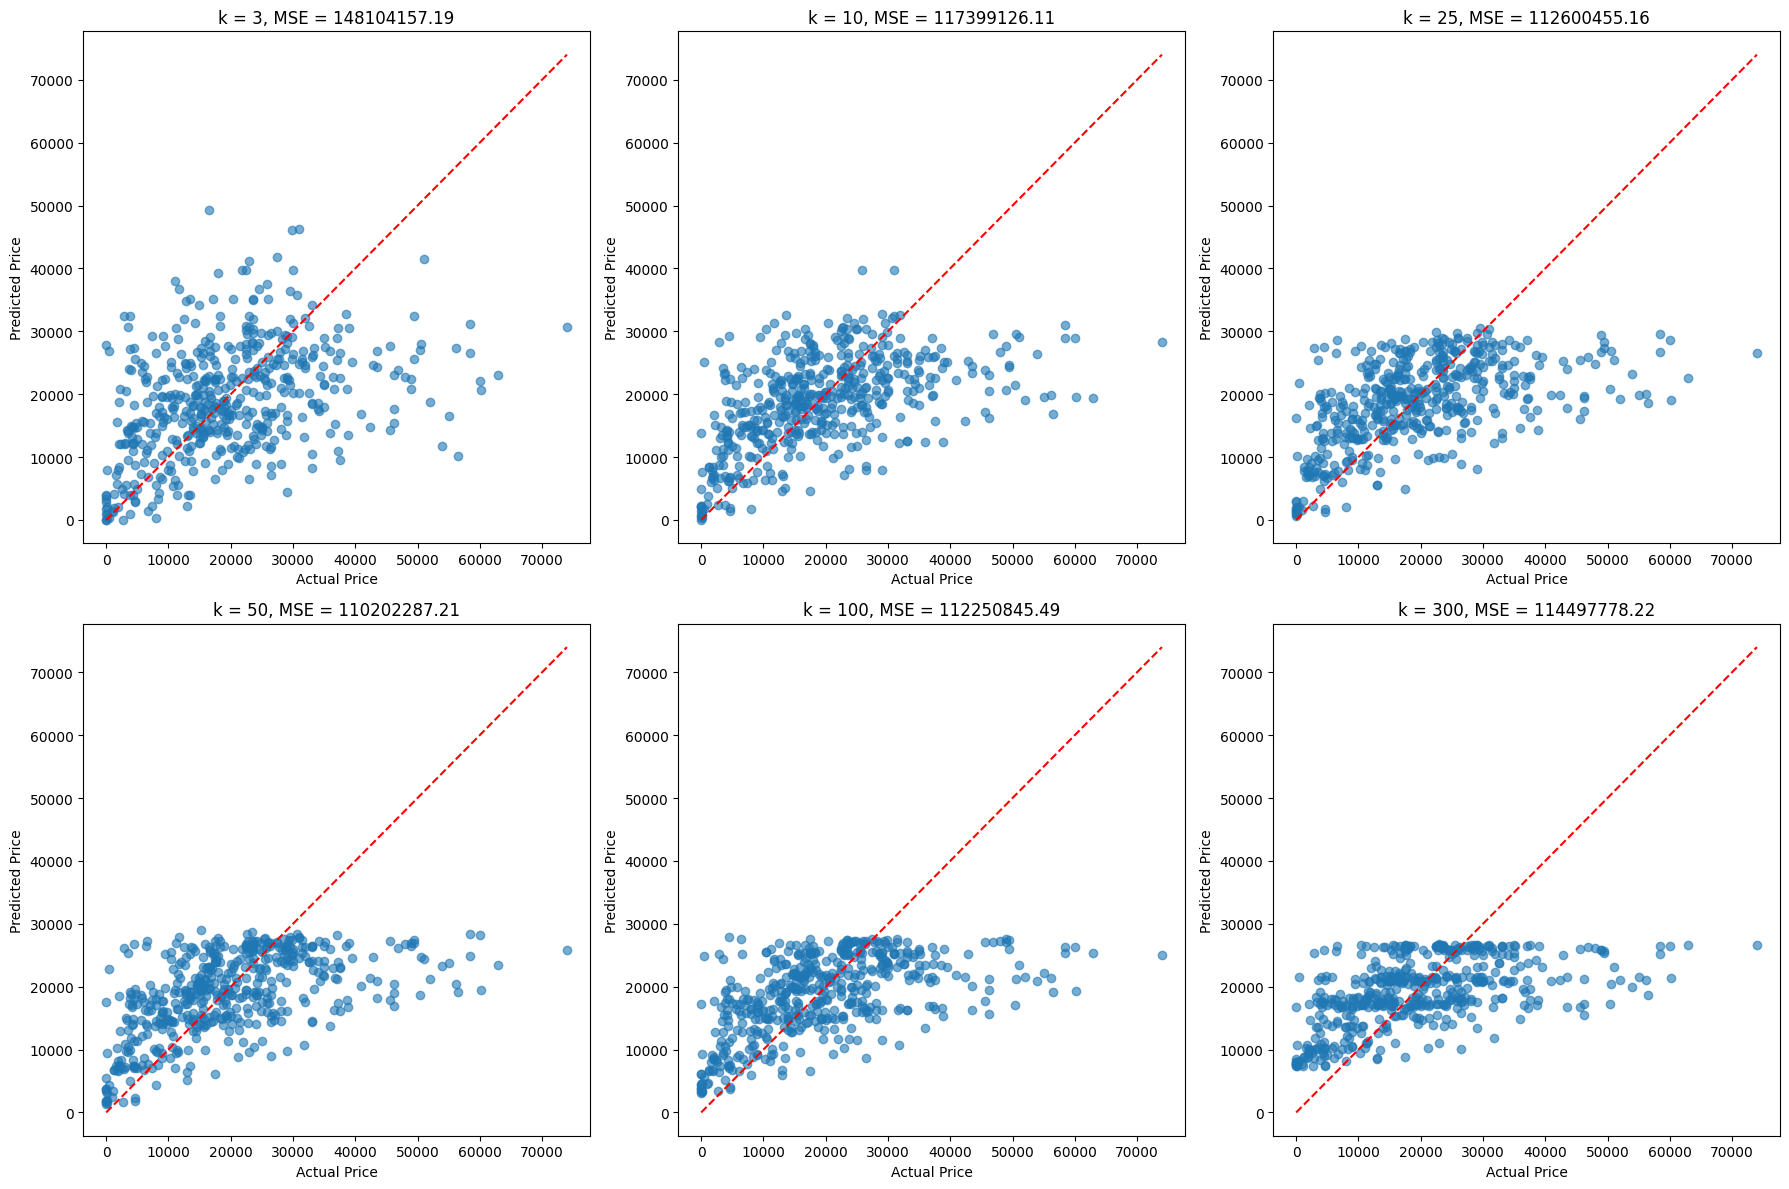

Mean Squared Errors for the k values:
k = 3: MSE = 148104157.19
k = 10: MSE = 117399126.11
k = 25: MSE = 112600455.16
k = 50: MSE = 110202287.21
k = 100: MSE = 112250845.49
k = 300: MSE = 114497778.22


In [9]:
k_values = [3, 10, 25, 50, 100, 300]

mse_results = {}

plt.figure(figsize=(18, 12))

for i, k in enumerate(k_values, 1):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = knn.predict(X_test)
    
    # Compute MSE
    mse = mean_squared_error(y_test, y_pred)
    mse_results[k] = mse
    
    # Scatterplot of actual vs predicted
    plt.subplot(2, 3, i)
    plt.scatter(y_test, y_pred, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()],
             [y_test.min(), y_test.max()],
             'r--')
    plt.title(f"k = {k}, MSE = {mse:.2f}")
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")

plt.tight_layout()
plt.show()

print("Mean Squared Errors for the k values:")
for k, mse in mse_results.items():
    print(f"k = {k}: MSE = {mse:.2f}")

4. As the k value increases, bias increases and variance decreases. A small k has predictions that follow the training points closely, which shows a lower bias and a higher variance. A medium k gives a better balance between bias and variance, which is usually a better generalization and smoother fit. Finally, a large k has predictions which are overly smoothed, which means a higher bias but lower variance.

5. Determine the optimal $k$ for these data.

In [8]:
# Find the k with the lowest MSE
optimal_k = min(mse_results, key=mse_results.get)
print(f"The optimal k is {optimal_k} with MSE = {mse_results[optimal_k]:.2f}")

The optimal k is 50 with MSE = 110202287.21


6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

6. When k was small, the model followed the training data closely. The predictions actually varied a lot, as points scattered widely around the reference line. This shows overfitting, as the model has low bias and high variance. When k was medium, the predictions smoothed out compared to the smaller k. The scatterplot actually showed points to be more consistently aligned with the reference line. The medium k had the best balance between bias and variance, which led to the lowest MSE. So, the medium k is where the model generalizes its best. Finally, for large k the predictions showed to be very smooth, which meant clustering around the mean price. Looking at the scatterplot you can see that there are many points which are compressed into a horizontal band. It fails to capture the variation in actual prices. So, this shows underfitting as the model has high bias and low variance.

**Q3.** This is a case study on $k$ nearest neighbor regression and imputation, using the `airbnb_hw.csv` data.

There are 30,478 observations, but only 22,155 ratings. We're going to build a kNN regressor to impute missing values. This is a common task, and illustrates one way you can use kNN in the future even when you have more advanced models available.

1. Load the `airbnb_hw.csv` data with Pandas. We're only going to use `Review Scores Rating`, `Price`, and `Beds`, so use `.loc` to reduce the dataframe to those variables.
2. Set use `.isnull()` to select the subset of the dataframe with missing review values. Set those aside in a different dataframe. We'll make predictions about them later.
3. Use `df = df.dropna(axis = 0, how = 'any')` to eliminate any observations with missing values/NA's from the dataframe.
4. For the complete cases, create a $k$-NN model that uses the variables `Price` and `Beds` to predict `Review Scores Rating`. How do you choose $k$? (Hint: Train/test split, iterate over reasonable values of $k$ and find a value that minimizes SSE on the test split using predictions from the training set.)
5. Predict the missing ratings. 
6. Do a kernel density plot of the training ratings and the predicted missing ratings. Do they look similar or not? Explain why.